In [12]:
from fynesse import access, assess, address

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [26]:
from config import MODELS, EVENTS, SEEDS

In [14]:
model = 'resnet50'
event = 'instructions'
event_hash = address.hash(event)

cycles = list(map(lambda x: int(x), [1e4, 2.5e4, 5e4, 7.5e4, 1e5, 2.5e5, 5e5, 7.5e5, 1e6, 2.5e6, 5e6, 7.5e6, 1e7]))

## Data Clean-Up

In [27]:
model = 'resnet50'
event = 'instructions'
event_hash = address.hash(event)

cycles = list(map(lambda x: int(x), [1e4, 2.5e4, 5e4, 7.5e4, 1e5, 2.5e5, 5e5, 7.5e5, 1e6, 2.5e6, 5e6, 7.5e6, 1e7]))

for seed in SEEDS:
    for cycle in cycles:
        access.process(f'../experiments/results/sp/{model}_{event_hash}_s{seed}_c{cycle}.txt', f'./data/csv/sp/{model}_{event_hash}_s{seed}_c{cycle}.csv')

## Percent Error in Actual Sampling Period

In [28]:
all_errors = []

for cycle in cycles:
    errors = []

    for seed in SEEDS:
        df = access.load_df(f'./data/csv/sp/{model}_{event_hash}_s{seed}_c{cycle}.csv')
        periods = df.loc[df['event'] == 'cycles', 'period'].values

        error = (periods - cycle) / cycle
        errors.append(error)

    all_errors.append(np.concatenate(errors))

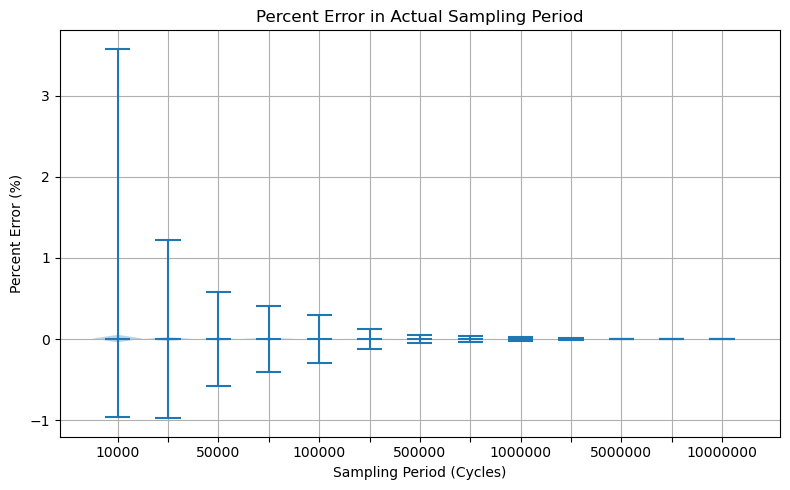

In [29]:
fig, ax = plt.subplots(figsize=(8,5))

ax.violinplot(all_errors, widths=1, showmeans=True)

ax.set_title('Percent Error in Actual Sampling Period')
ax.set_xticks([i+1 for i in range(len(cycles))])
ax.set_xticklabels(['' if i%2 else cycle for i, cycle in enumerate(cycles)])

ax.set_xlabel('Sampling Period (Cycles)')
ax.set_ylabel('Percent Error (%)')

ax.grid()

plt.tight_layout()
plt.savefig('./figures/sp/percent_error.png')
plt.show()

## Percentage of Inferences Successfully Profiled

In [32]:
all_ninferences = []

for cycle in cycles:
    ninferences = []

    for seed in SEEDS:
        df = access.load_df(f'./data/csv/sp/{model}_{event_hash}_s{seed}_c{cycle}.csv')
        ninferences.append(len(assess.extract_inferences(df)))

    all_ninferences.append(ninferences)

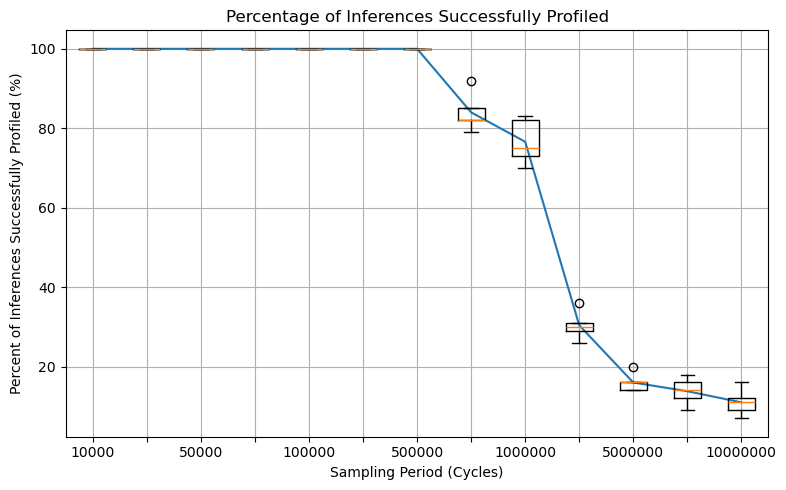

In [37]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot([i+1 for i in range(len(cycles))], list(map(lambda values: np.mean(values), all_ninferences)))
ax.boxplot(all_ninferences)

ax.set_xlabel('Sampling Period (Cycles)')
ax.set_ylabel('Percent of Inferences Successfully Profiled (%)')

ax.set_title('Percentage of Inferences Successfully Profiled')
ax.set_xticks([i+1 for i in range(len(cycles))])
ax.set_xticklabels(['' if i%2 else cycle for i, cycle in enumerate(cycles)])

ax.grid()

plt.tight_layout()
plt.savefig('./figures/sp/inferences_profiled.png')
plt.show()

## Total Number of Samples Recorded

In [34]:
all_nsamples = []

for cycle in cycles:
    nsamples = []

    for seed in SEEDS:
        df = access.load_df(f'./data/csv/sp/{model}_{event_hash}_s{seed}_c{cycle}.csv')
        nsamples.append(len(df.loc[df['event'] == 'instructions']))

    all_nsamples.append(nsamples)

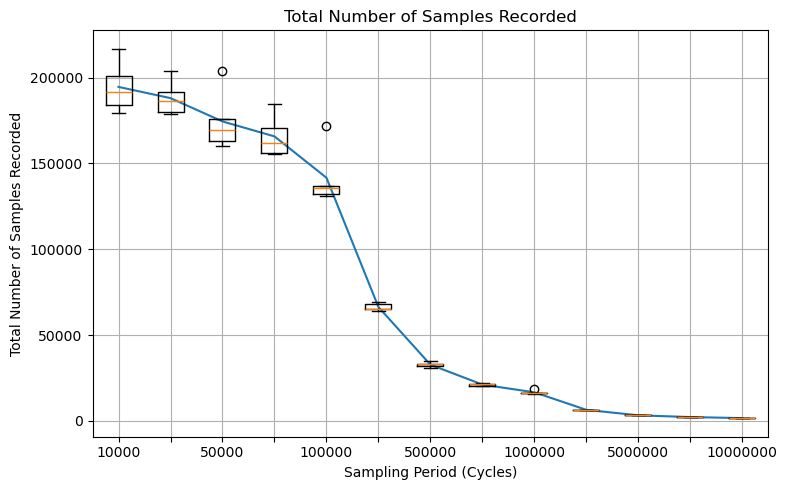

In [35]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot([i+1 for i in range(len(cycles))], list(map(lambda values: np.mean(values), all_nsamples)))
ax.boxplot(all_nsamples)

ax.set_xlabel('Sampling Period (Cycles)')
ax.set_ylabel('Total Number of Samples Recorded')

ax.set_title('Total Number of Samples Recorded')
ax.set_xticks([i+1 for i in range(len(cycles))])
ax.set_xticklabels(['' if i%2 else cycle for i, cycle in enumerate(cycles)])

ax.grid()

plt.tight_layout()
plt.savefig('./figures/sp/samples_recorded.png')
plt.show()